### **Recall) 데이터셋 이해하기**

#### 1. Boston house prices dataset

|내용|설명|
|:--|:--|
|Number of instances|506|
|Number of Attributes|13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.|
|Attribute information(in order)|CRIM per capita crime rate by town|
||ZN proportion of residential land zonedfor lots over 25,000 sq.ft.|
||INDUS proportion of non-retail business acres per town|
||CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)|
||NOX nitric oxides concentration (parts per 10 million)|
||RM average number of rooms per dwelling|
||AGE proportion of owner-occupied units built prior to 1940|
||DIS weighted distances to five Boston employment centres|
||RAD index of accessibility to radial highways|
||TAX full-value property-tax rate per $10,000|
||PTRATIO pupil-teacher ratio by town|
||B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town|
||LSTAT % lower status of the population|
||MEDV 중위값_천 달러대의 집을 소유한 사람|






#### 2. Breast cancer wisconsin(diagnostic) dataset

|내용|설명|
|:--|:--|
|Number of Instances|569|
|Number of Attributes|30 numeric, predictive attributes and the class|
|Attribute Information|radius (mean of distances from center to points on the perimeter)|
||texture (standard deviation of gray-scale values)|
||perimeter|
||area|
||smoothness (local variation in radius lengths)|
||compactness (perimeter^2 / area - 1.0)|
||concavity (severity of concave portions of the contour)|
||concave points (number of concave portions of the contour)|
||symmetry|
||fractal dimension (“coastline approximation” - 1)|
|class|WDBC-Malignant, WDBC-Benign|
|Class Distribution|212 - Malignant, 357 - Benign|


#### TODO:
  1. scikit learn import하기
  2. 두 가지 데이터셋(위스콘신 유방암, 보스턴 주택) 준비하기
  3. DT모듈 활용하기, DecisionTreeRegression, DecisionTreeClassifier 
  4. 트리모듈 이애하기, Tree.export_graphviz메서드, Tree.feature_importances 특성,  

  => 결과적으로, DT모델의 디자인 패턴에 대한 이해가 필요

##  plot_feature_importance_cancer 함수를 작성해서 특성중요도를 시각화 하시오

#### **BREAKING**

In [2]:
# 모듈 불러오기
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

In [3]:
# 데이터 feature 이름 부여하기
cancer = datasets.load_breast_cancer()
X ,y = cancer.data, cancer.target
feature_names = [f"feature {i}" for i in range(X.shape[1])]
print(feature_names)

['feature 0', 'feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 9', 'feature 10', 'feature 11', 'feature 12', 'feature 13', 'feature 14', 'feature 15', 'feature 16', 'feature 17', 'feature 18', 'feature 19', 'feature 20', 'feature 21', 'feature 22', 'feature 23', 'feature 24', 'feature 25', 'feature 26', 'feature 27', 'feature 28', 'feature 29']


In [4]:
# 데이터 준비하기
X_train, X_test, y_train, y_test = train_test_split(X, y)

rgs = tree.DecisionTreeClassifier()
rgs.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
# 특성 중요도 평균 및 표준편차 추출하기
importances = rgs.feature_importances_
std = np.std(rgs.feature_importances_)

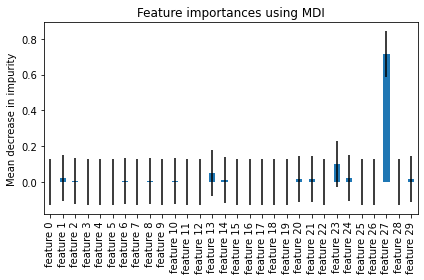

In [6]:
# 특성에 따른 특성 중요도를 시각화하기
cancer_importances = pd.Series(importances, index = feature_names)

fig, ax = plt.subplots()
cancer_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### **SOLVING**

In [7]:
# 특성 중요도 시각화 함수 작성하기
def plot_feature_importance_cancer():
  from sklearn import tree
  from sklearn import datasets
  from sklearn.model_selection import train_test_split
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt

  cancer = datasets.load_breast_cancer()
  X ,y = cancer.data, cancer.target
  feature_names = [f"feature {i}" for i in range(X.shape[1])]  

  X_train, X_test, y_train, y_test = train_test_split(X, y)

  rgs = tree.DecisionTreeClassifier()
  rgs.fit(X_train, y_train)

  importances = rgs.feature_importances_
  std = np.std(rgs.feature_importances_)
               
  cancer_importances = pd.Series(importances, index = feature_names)

  fig, ax = plt.subplots()
  cancer_importances.plot.bar(yerr=std, ax=ax)
  ax.set_title("Feature importances using MDI")
  ax.set_ylabel("Mean decrease in impurity")
  fig.tight_layout()
  
  return 1

1

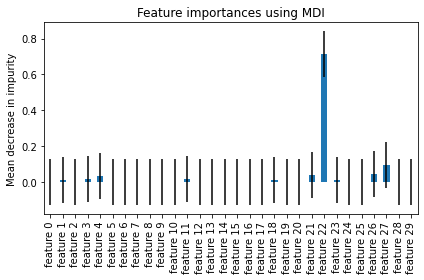

In [8]:
plot_feature_importance_cancer()

* 결과 해석: feature27과 feature20 순으로 특성중요도가 높으므로 두 특성은 여타의 것보다 상대적으로 중요하다는 것을 알 수 있다.



## data set 에 Scikit-learn에 있는 DecisionTreeRegressor와 DecisionTreeClassifier를 구현하여 다양한 결과의 성능 평가를 하시오

#### ***2.1 Boston data에서 DecisionTreeRegression***

##### **BREAKING**

In [9]:
# 모듈 호출하기 및 데이터 준비하기
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# 데이터 준비하기
boston = datasets.load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

In [11]:
# 모델 학습하기
rgs = DecisionTreeRegressor()
rgs.fit(X_train, y_train)

DecisionTreeRegressor()

In [12]:
# 오차 평균과 표준편차 구하기
res = rgs.predict(X_test)
error = []
for i in range(len(res)):
  error.append(res[i]-y_test[i])
error_mean = np.mean(error) 
error_std = np.std(error)
print(error_mean, error_std)

0.4622047244094488 6.32665812362309


In [13]:
accuracies = cross_val_score(rgs, X_test, y_test)
print(f"오차평균 = {accuracies.mean()}, 오차표준편차 = {accuracies.std()}")

오차평균 = 0.37069977216210664, 오차표준편차 = 0.40184007909175207


##### **SOLVING**

In [14]:
# 교차검증 성능 출력 함수
def regressor_per(n):
  boston = datasets.load_boston()
  X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

  rgs = DecisionTreeRegressor(max_depth= n)
  rgs.fit(X_train, y_train)
  
  accuracies = cross_val_score(rgs, X_test, y_test)
  error_mean = accuracies.mean()
  error_std = accuracies.std()

  return error_mean, error_std

# Max_depth에 따른 성능 평가 비교하기
print("<Max_depth에 따른 [Regressor] 성능평가>")
for i in range(200, 400, 50):
  mean, std = regressor_per(i)
  print(f"Max_depth: {i} | mean: {mean} | std: {std}")

<Max_depth에 따른 [Regressor] 성능평가>
Max_depth: 200 | mean: 0.7471668156224619 | std: 0.09756262986719183
Max_depth: 250 | mean: 0.5802967890439967 | std: 0.15302599767389313
Max_depth: 300 | mean: 0.3771050417293031 | std: 0.3280324625569651
Max_depth: 350 | mean: 0.7529161706496557 | std: 0.13573973663657155


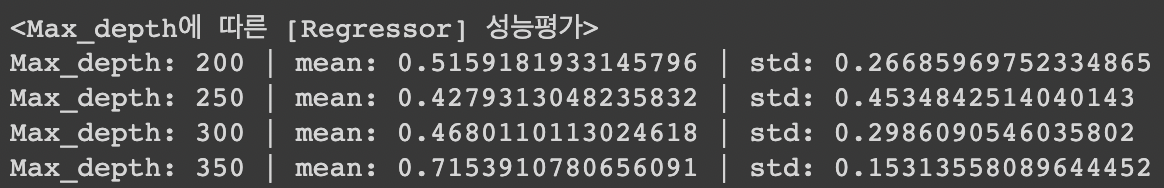


결과를 보면 max_depth가 250일 떄, 가장 낮은 평균을 보이므로, 250을 선택하는 것이 다소 합리적이다.

#### ***2.2 Cancer data에서  DecisionTreeClassification***

##### **BREAKING**

In [15]:
# 데이터 준비하기
cancer = datasets.load_breast_cancer()
X1_train, X1_test, y1_train, y1_test = train_test_split(cancer.data, cancer.target)
print(len(X1_test))
print(len(y1_test))

143
143


In [16]:
# 모델 적용하기
clf = DecisionTreeClassifier()
clf.fit(X1_train, y1_train)

# 성능 평가를 위한 혼동행렬
res = clf.predict(X1_test)
conf = np.zeros((143,143))
for i in range(len(res)):
  conf[res[i]][y1_test[i]] += 1
print(conf)

[[49.  7.  0. ...  0.  0.  0.]
 [ 2. 85.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [17]:
# 혼동행렬을 이용한 정확률 계산
no_correct = 0
for i in range(143):
  no_correct += conf[i][i]
accuracy = no_correct/len(res)
print(f"테스트 집합에 대한 정확률은 {accuracy*100}%입니다.")

테스트 집합에 대한 정확률은 93.7062937062937%입니다.


In [18]:
# 교차검증을 통한 정확률 계산
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(clf, X1_test, y1_test, cv = 5)
print(f"정확률(평균)= {accuracies.mean()*100}, 표준편차 = {accuracies.std()}입니다.")

정확률(평균)= 88.10344827586206, 표준편차 = 0.04777055338877108입니다.


##### **SOLVING**

In [19]:
# 교차검증 성능 출력 함수

def classifier_per(n):
  cancer = datasets.load_breast_cancer()
  X1_train, X1_test, y1_train, y1_test = train_test_split(cancer.data, cancer.target)

  clf = DecisionTreeClassifier(max_depth= n)
  clf.fit(X1_train, y1_train)

  accuracies = cross_val_score(clf, X1_test, y1_test, cv = 5)
  mean, std = accuracies.mean()*100, accuracies.std()
  return mean, std

# Max_depth에 따른 성능 평가 비교하기
print("<Max_depth에 따른 [Classifier] 성능평가>")
for i in range(300, 500, 50):
  mean, std = classifier_per(i)
  print(f"Max_depth: {i} | mean: {mean} | std: {std}")

<Max_depth에 따른 [Classifier] 성능평가>
Max_depth: 300 | mean: 88.8423645320197 | std: 0.06337089489340027
Max_depth: 350 | mean: 89.38423645320196 | std: 0.07562178054075844
Max_depth: 400 | mean: 89.60591133004927 | std: 0.06490790388915924
Max_depth: 450 | mean: 87.41379310344828 | std: 0.06396547456233605


* 결과 해석: max_depth가 300일 때 정확률(평균)이 가장 크므로, max_depth를 300으로 설정하는 것이 다소 합리적으로 보인다.